## Лабораторна робота №2: "Імплементація алгоритмів стиснення"

Склад команди та розподіл виконаних завдань:

-Сень Іван 

-Кравчук Євгеній

Для кожного з алгоритмів поданих нижче
- опишіть як працює алгорит
- напишіть класи з методами encode та decode
- перевірте правильність кодування та декодування
- дослідіть час виконання коду в залежності від розмірів вхідних даних
- оцініть ступінь стиснення(у відсотка) в залежності від розмірів
- напишіть висновок про ефективність різних алгоритмів та умови за яких той чи інший алгоритм дають кращий результат

# Алгоритм Гаффмана

В цьому алгоритмі доцільно імплементувати клас node та додаткові функції в Huffman для побудови дерева кодування

In [2]:
class Huffman:
    def encode(self, text: str) -> tuple[str, dict[str, str]]:
        pass

    def decode(self, code: str, coding_dict: dict[str, str]):
        pass

# Алгоритм LZW

In [51]:
class LZW:
    def encode(self, text: str):
        coding_dict = {}
        for i in range(256):
            coding_dict[chr(i)] = i
        result = []
        curr = ""
        while text:
            if curr + text[0] in coding_dict:
                curr += text[0]
            else:
                result.append(coding_dict[curr])
                coding_dict[curr + text[0]] = len(coding_dict)
                curr = text[0]
            text = text[1:]
        result.append(coding_dict[curr])
        # print(coding_dict.keys())
        # print(coding_dict.values())
        return result, list(coding_dict.keys())

    def decode(self, code: str) -> str:
        code = code[0]
        coding_dict = {}
        for i in range(256):
            coding_dict[i] = chr(i)
        result = ""
        old = code[0]
        result += coding_dict[old]
        code = code[1:]
        while code:
            new = code[0]
            if new in coding_dict:
                result += coding_dict[new]
                coding_dict[len(coding_dict)] = coding_dict[old] + coding_dict[new][0]
            else:
                result += coding_dict[old] + coding_dict[old][0]
                coding_dict[len(coding_dict)] = coding_dict[old] + coding_dict[old][0]
            old = new
            code = code[1:]
        return result

In [55]:
lorem_ipsum_lines = []
with open("test_small.txt", "r", encoding="utf-8") as file:
    for line in file:
        if line.strip() == "":
            continue
        lorem_ipsum_lines.append(line.strip())
encoded_ipsum = []
decoded_ipsum = []
# print(lorem_ipsum_lines)
lzw = LZW()
for line in lorem_ipsum_lines:
    encoded_ipsum.append(lzw.encode(line))
    decoded_ipsum.append(lzw.decode(encoded_ipsum[-1]))
# encoded_ipsum, coding_dict = lzw.encode(lorem_ipsum_lines[0])
# print(lzw.encode(encoded_ipsum))
for line in lorem_ipsum_lines:
    print(line == decoded_ipsum[lorem_ipsum_lines.index(line)])

True


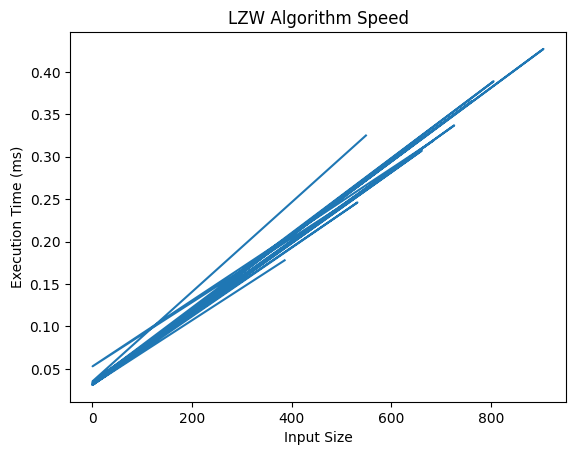

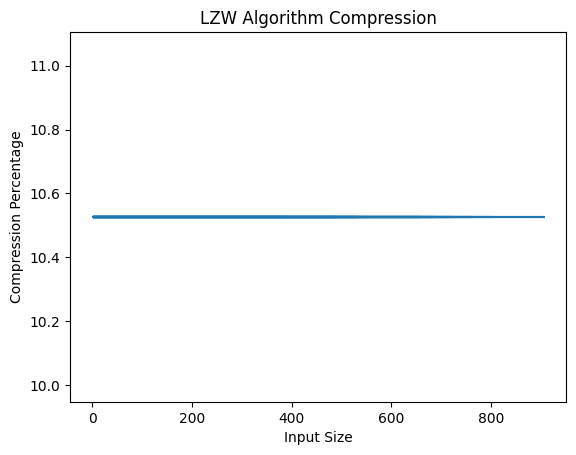

In [43]:
import matplotlib.pyplot as plt
import time

lzw = LZW()
sizes = []
times = []
compression_percentages = []

# Measure the execution time and compression percentage for each input size
with open("test_huge.txt", "r", encoding="utf-8") as file:
    input_data = file.readlines()

for line in input_data:

    start_time = time.time()
    encoded_data = lzw.encode(line)
    size = len(line)
    end_time = time.time()

    execution_time = (end_time - start_time) * 1000
    compression_percentage = (len(encoded_data) / len(input_data)) * 100

    sizes.append(size)
    times.append(execution_time)
    compression_percentages.append(compression_percentage)

# Plot the input sizes vs. execution times
plt.plot(sizes, times)
plt.xlabel('Input Size')
plt.ylabel('Execution Time (ms)')
plt.title('LZW Algorithm Speed')
plt.show()

# Plot the input sizes vs. compression percentages
plt.plot(sizes, compression_percentages)
plt.xlabel('Input Size')
plt.ylabel('Compression Percentage')
plt.title('LZW Algorithm Compression')
plt.show()


# Алгоритм LZ77

Потрібно заміряти розміри саме тексту, проте для роботи доцільно використовувати список тюплів, тому для зручності варто імплементувати додаткові алгоритми _text2list та _list2text

In [ ]:
class LZ77:
    def __init__(self, buffer_size: int):
        pass

    def encode(self, text: str) -> str:
        pass

    def decode(self, code: str) -> str:
        pass

# Алгоритм Deflate

In [ ]:
class Deflate:
    def __init__(self, buffer_size: int):
        pass

    def encode(self, text: str) -> str:
        pass

    def decode(self, code: str) -> str:
        pass